In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import deque

C:\Users\Alvertos\Anaconda3\envs\keras\lib\site-packages\PIL\Image.py:116: RuntimeWarning: The _imaging extension was built for another version of Pillow or PIL:
Core version: 5.3.0
Pillow version: 5.4.1
  warnings.warn(str(v), RuntimeWarning)


In [2]:
#Importing dataset
main_dataset = pd.read_csv("AAPL.csv")
main_dataset_1 = main_dataset.drop("Date",1)
print(main_dataset_1.head(10))

        Open       High        Low      Close  Adj Close     Volume
0  75.701431  77.500000  75.697144  76.532860  65.135979   94623200
1  76.888573  78.104286  76.808571  78.055717  66.432060   83140400
2  79.074287  80.028572  78.808571  79.622856  67.765808   97909700
3  79.271431  79.550003  78.811432  79.178574  67.387703   57319500
4  78.782860  78.867142  77.128571  77.238571  65.736603  106684900
5  77.284286  78.581429  77.202858  78.438568  66.757919   82131700
6  78.701431  79.612854  78.258568  78.787140  67.054565   94996300
7  78.562859  79.500000  77.830002  79.454285  67.622375  100809800
8  79.142860  79.374283  77.821426  78.010002  66.393143  107338700
9  78.581429  79.257141  77.964287  78.642860  66.931786  138719700


In [3]:
columns_names=list(main_dataset_1.columns.values)
print(columns_names)

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [4]:
#split data to train and testing we will use the last 10% of our dataset as testing
main_dataset_1_values = main_dataset_1.values
train_size = int(len(main_dataset_1_values) * 0.90) 
test_size = len(main_dataset_1_values) - train_size
training_dataset, validation_dataset = main_dataset_1_values[0:train_size, :], main_dataset_1_values[train_size:len(main_dataset_1_values), :]

In [5]:
#Normalize dataset
from sklearn import preprocessing
taget_colum=training_dataset[:,0]
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
training_dataset_scaled = min_max_scaler.fit_transform(training_dataset)
min_Max_scaler_target=preprocessing.MinMaxScaler(feature_range = (0,1))
taget_colum=taget_colum.reshape(-1,1)
training_taret = min_Max_scaler_target.fit_transform(taget_colum)

C:\Users\Alvertos\Anaconda3\envs\keras\lib\site-packages\PIL\Image.py:116: RuntimeWarning: The _imaging extension was built for another version of Pillow or PIL:
Core version: 5.3.0
Pillow version: 5.4.1
  warnings.warn(str(v), RuntimeWarning)


In [6]:
sequence_lenght = 30 # we are looking a month back
future_period_target =7 # we want to predict 7 days in to the future
def sequential_data(dataset):
    data_X_values, data_Y_values = [], []
    for i in range(len(dataset) - sequence_lenght):
        a = dataset[i:(i + sequence_lenght),:]
        data_X_values.append(a)
        data_Y_values.append(dataset[i + future_period_target, 0])
    return np.array(data_X_values), np.array(data_Y_values)

In [7]:
sequence_lenght = 30 # we are looking a month back
future_period_target =7 # we want to predict 7 days in to the future
def sequential_data_2(dataset):
    data_X_values, data_Y_values = [], []
    for i in range(sequence_lenght,len(dataset) - future_period_target):
        a = dataset[i-sequence_lenght:i,:]
        data_X_values.append(a)
        data_Y_values.append(dataset[i + future_period_target, 0])
    return np.array(data_X_values), np.array(data_Y_values)

In [8]:
train_X, train_Y = sequential_data_2(training_dataset_scaled)  #using the second function

In [9]:
#reshape input to be  [samples, time steps, features]
train_X= np.reshape(train_X, (train_X.shape[0], sequence_lenght, 6)) #6 is the numver of features i have

In [10]:
#Training the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, CuDNNLSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint

C:\Users\Alvertos\Anaconda3\envs\keras\lib\site-packages\PIL\Image.py:116: RuntimeWarning: The _imaging extension was built for another version of Pillow or PIL:
Core version: 5.3.0
Pillow version: 5.4.1
  warnings.warn(str(v), RuntimeWarning)
C:\Users\Alvertos\Anaconda3\envs\keras\lib\site-packages\PIL\Image.py:116: RuntimeWarning: The _imaging extension was built for another version of Pillow or PIL:
Core version: 5.3.0
Pillow version: 5.4.1
  warnings.warn(str(v), RuntimeWarning)


In [11]:
model = Sequential()
model.add(CuDNNLSTM(10, return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())  #normalizes activation outputs, same reason you want to normalize your input data.

model.add(CuDNNLSTM(10, return_sequences=True))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(CuDNNLSTM(30))
model.add(Dropout(0.2))
model.add(BatchNormalization())

#Outpute layer
model.add(Dense(units=1))

#Compiling the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [12]:
#Training the model
model.fit(train_X,train_Y,epochs=100,batch_size=32)

Epoch 1/100
1096/1096 [==============================] - 5s 5ms/step - loss: 0.0479
Epoch 2/100
1096/1096 [==============================] - 0s 400us/step - loss: 0.0040
Epoch 3/100
1096/1096 [==============================] - 1s 460us/step - loss: 0.0029
Epoch 4/100
1096/1096 [==============================] - 0s 456us/step - loss: 0.0030
Epoch 5/100
1096/1096 [==============================] - 1s 487us/step - loss: 0.0027
Epoch 6/100
1096/1096 [==============================] - 1s 457us/step - loss: 0.0027
Epoch 7/100
1096/1096 [==============================] - ETA: 0s - loss: 0.002 - 0s 447us/step - loss: 0.0027
Epoch 8/100
1096/1096 [==============================] - 0s 441us/step - loss: 0.0027
Epoch 9/100
1096/1096 [==============================] - 1s 577us/step - loss: 0.0027
Epoch 10/100
1096/1096 [==============================] - 0s 452us/step - loss: 0.0025
Epoch 11/100
1096/1096 [==============================] - 1s 457us/step - loss: 0.0025
Epoch 12/100
1096/1096 [======

1096/1096 [==============================] - 0s 398us/step - loss: 0.0016
Epoch 96/100
1096/1096 [==============================] - 0s 390us/step - loss: 0.0016
Epoch 97/100
1096/1096 [==============================] - 0s 388us/step - loss: 0.0016
Epoch 98/100
1096/1096 [==============================] - 0s 405us/step - loss: 0.0016
Epoch 99/100
1096/1096 [==============================] - 0s 415us/step - loss: 0.0016
Epoch 100/100
1096/1096 [==============================] - 0s 410us/step - loss: 0.0015


In [13]:
#Testing the model on unseen data
validation_dataset_scaled = min_max_scaler.transform(validation_dataset)
validation_X ,validation_y = sequential_data(validation_dataset_scaled)
validation_X = np.reshape(validation_X, (validation_X.shape[0], sequence_lenght, 6))
predicted_stock_price = model.predict(validation_X)
predicted_stock_price = min_Max_scaler_target.inverse_transform(predicted_stock_price)

In [14]:
real_stock_price=validation_dataset[:- sequence_lenght,0]
real_stock_price=real_stock_price.reshape(-1,1)
real_stock_price_scaled = min_Max_scaler_target.transform(real_stock_price)

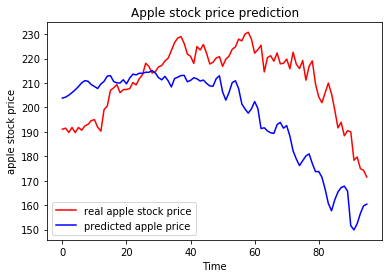

In [15]:
plt.plot(real_stock_price , color= 'red',label="real apple stock price")
plt.plot(predicted_stock_price, color= "blue", label="predicted apple price")
plt.title("Apple stock price prediction")
plt.xlabel("Time")
plt.ylabel("apple stock price")
plt.legend()
plt.show()

In [16]:
#concatinating
training_part=training_dataset_scaled[-sequence_lenght:]
new_validation_scaled=np.concatenate((training_part,validation_dataset_scaled),axis=0)#concatenate verticaly

In [17]:
#Testing the model on unseen data
validation_dataset_scaled = min_max_scaler.transform(validation_dataset)
validation_X ,validation_y = sequential_data_2(new_validation_scaled)
validation_X = np.reshape(validation_X, (validation_X.shape[0], sequence_lenght, 6))
predicted_stock_price = model.predict(validation_X)
predicted_stock_price = min_Max_scaler_target.inverse_transform(predicted_stock_price)

In [18]:
real_stock_price=validation_dataset[:-future_period_target,0]
real_stock_price=real_stock_price.reshape(-1,1)
real_stock_price_scaled = min_Max_scaler_target.transform(real_stock_price)

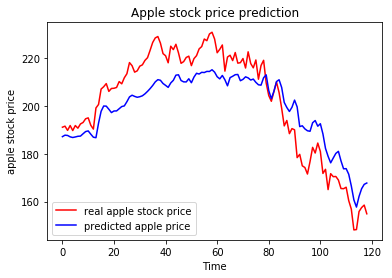

In [19]:
plt.plot(real_stock_price , color= 'red',label="real apple stock price")
plt.plot(predicted_stock_price, color= "blue", label="predicted apple price")
plt.title("Apple stock price prediction")
plt.xlabel("Time")
plt.ylabel("apple stock price")
plt.legend()
plt.show()